# Project Name : FBI Time Series

#### Project Type: Time Series Forecasting
#### Contribution: Individual
#### Name of Candidate: Dadi Rohith Balaram Sai Venkat

# Project Summary 
The FBI Crime Investigation Project is an innovative initiative leveraging data analytics to forecast crime patterns and enhance public safety. By analyzing detailed crime data, including types, locations, timestamps, and neighborhood specifics, the project aims to develop a predictive model for estimating monthly crime incidents. This spatial and temporal analysis empowers law enforcement agencies to optimize patrols, allocate resources efficiently, and implement proactive crime prevention strategies.

The project holds broader societal significance, enabling urban planners, policymakers, and community leaders to foster safer communities. Insights into high-risk areas and times inform the placement of public safety measures like surveillance cameras and street lighting. Moreover, the data-driven approach supports public awareness campaigns, emergency response planning, and efforts to address root causes of crime collaboratively with community organizations.

In [1]:
# GitHUb Link


# Problem Statement
Rising crime rates and the complex dynamics of criminal activities in urban centers across the United States present significant challenges for law enforcement agencies. Traditional methods are often insufficient in addressing the spatial and temporal variability of crimes, limiting their ability to anticipate trends, allocate resources effectively, and implement proactive measures to prevent incidents. To address these limitations, there is a critical need for advanced data-driven solutions.

The FBI Crime Investigation Project aims to develop a predictive model that uses detailed crime data—such as types, geographical coordinates, neighborhood specifics, and timestamps—to estimate the number of crime incidents on a monthly basis. This model seeks to empower law enforcement agencies with actionable insights for optimizing patrol schedules, deploying resources to high-risk areas, and improving overall public safety. Additionally, the project supports urban planners, policymakers, and community leaders by providing valuable insights to guide safety measures, emergency planning, and collaborative efforts to address underlying social factors contributing to crime.

# General Guidelines : -
1.Well-structured, formatted, and commented code is required.

2.Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

3.The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
4.Each and every logic should have proper comments.

5.You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

  Chart visualization code
        
    Why did you pick the specific chart?
    What is/are the insight(s) found from the chart?
    Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific    reason.
    You have to create at least 15 logical & meaningful charts having important insights.
    [ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

6.You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
  Explain the ML Model used and it's performance using Evaluation metric Score Chart.

  Cross- Validation & Hyperparameter Tuning

  Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

  Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# Let's Begin

## 1.Know Your Data

#### Import Libraries

In [71]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import kruskal
from prophet import Prophet
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load Your DataSet

In [3]:
train_df = pd.read_excel("train.xlsx")
test_df = pd.read_csv("test.csv")

#### DataSet First View

In [4]:
train_df.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


In [5]:
test_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


#### DataSet Rows & Columns Count

In [6]:
train_df.shape

(474565, 13)

In [7]:
test_df.shape

(162, 4)

#### DataSet Information

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


#### Duplicate Values

In [9]:
train_df.duplicated().sum()

np.int64(44618)

#### Missing/Null Values

In [10]:
train_df.isnull().sum()

TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

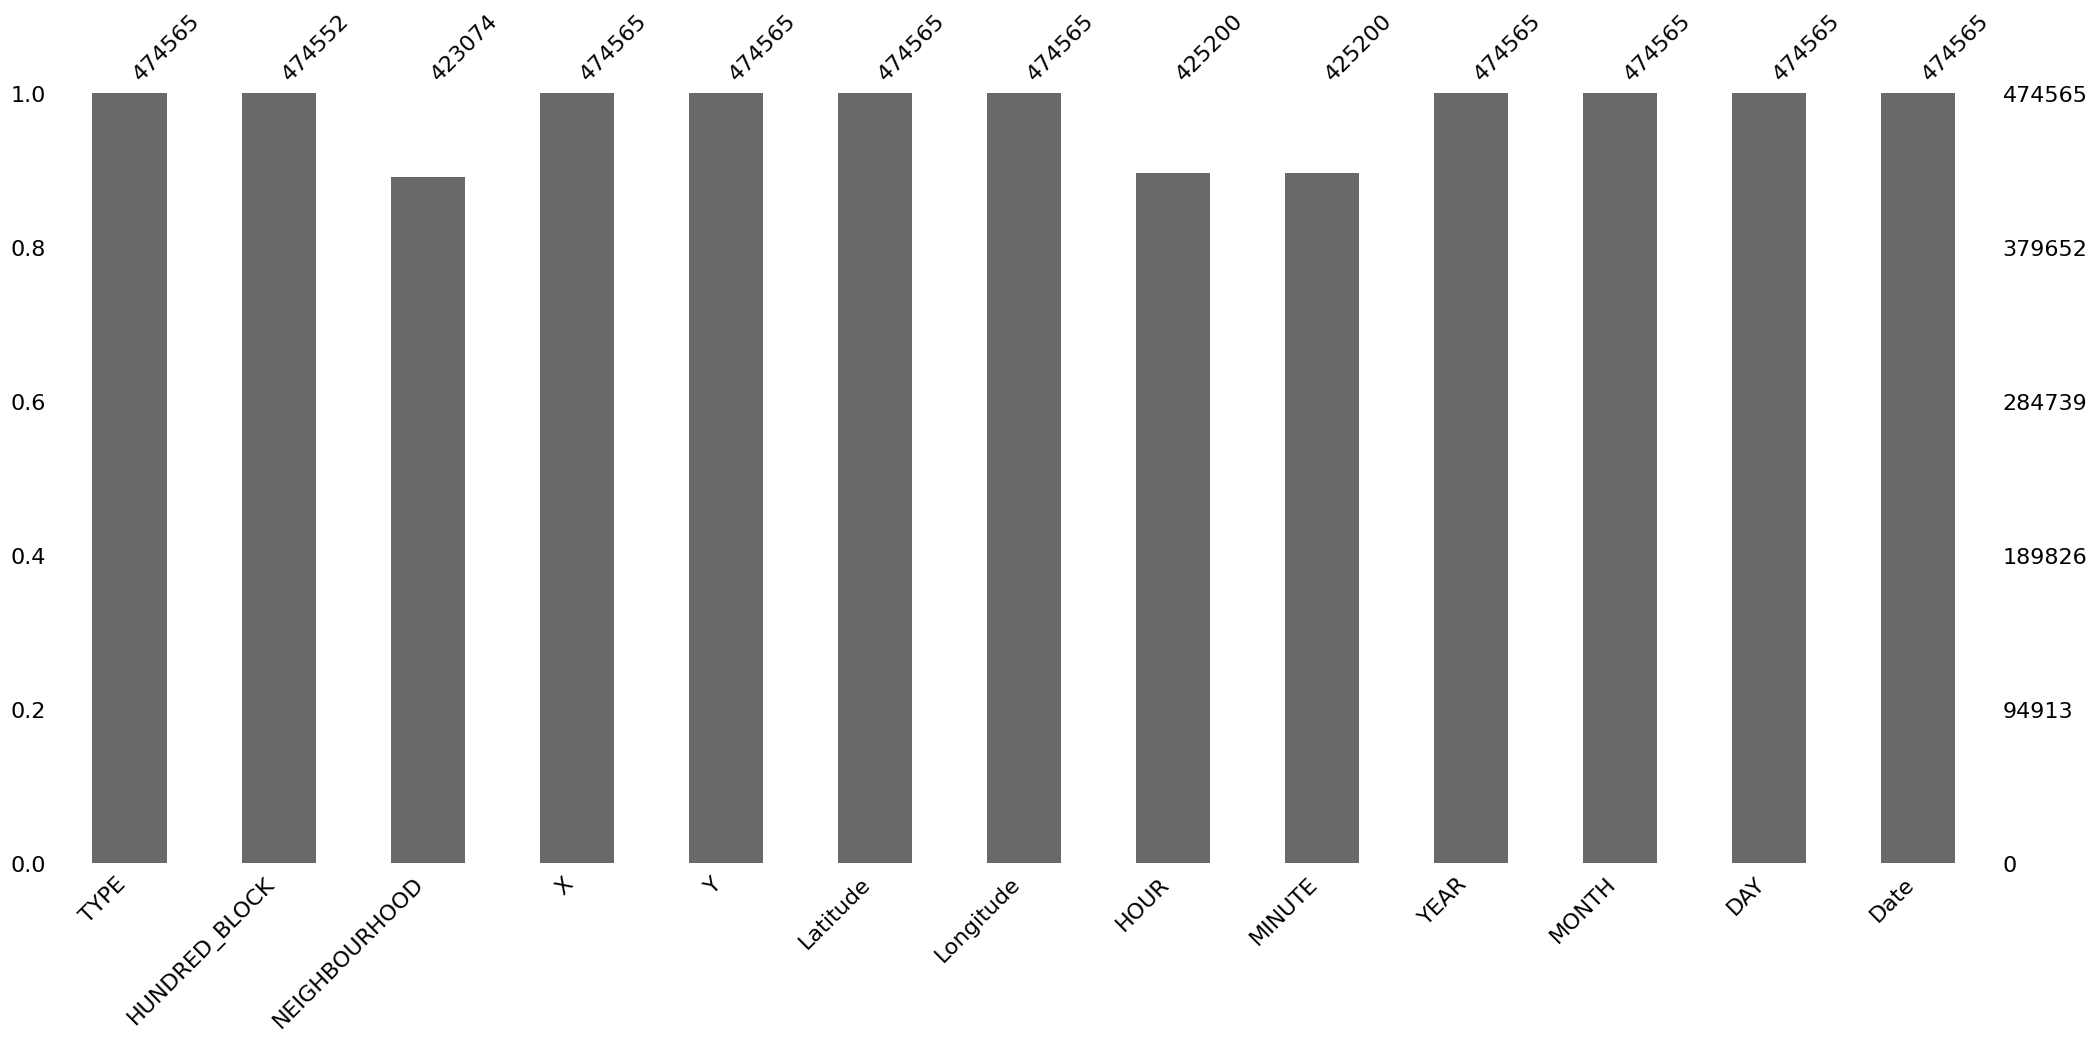

In [11]:
msno.bar(train_df)
plt.show()

### What did you know about your dataset?

Firstly I work with train_df for training model so in this dataset there are 474565 rows and 13 columns.

From that 13 columns 4 columns have missing values.

There are 44618 rows are duplicate so we need to remove that rows.

# 2. Understanding the Values

In [12]:
train_df.columns

Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

In [13]:
train_df.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


#### Variables Description

Type :- The category of the incident (e.g, theft,assault,vandalism)

HundredBlock :- Approximate street block where the incident occured.
    
Neighborhood :- The neighborhood or district where the crime was reported.
    
X :- X-coordinate in the geographic coordinate system (used for mapping).
                                                       
Y :- Y-coordinate in the geographic coordinate system.
    
Latitude :- Geographic latitude of the crime location.
    
Logtitude :- Geographic longtitude of the crime location.
    
Hour :- The hour of the day when the incident was reported.
    
Minute :- The minute of the hour when the incident was reported.
    
Year :- The year in which the incident occured.
    
Month :- The month in which the inncident occured.
    
Day :- The day of the month when the crime was reported.
    
Date :- The full timestamp(date) when the crime was recorded.

#### Posible Data Usess and Importance

TYPE :- Hepls classify crime patterns and predict future incidents.
    
Hunderd Block and Neighbourhood :- Useful for crime hotspot analysis.

Latitude and Longtitude :- Enables geospatial crime mapping and clustering.

Hour and Minute :- Helps identify peak crime hours and schedule police patrols.
    
Date,Year,Month,Day :- Aloows time-series forecasting of crime trends.

#### Check Unique Values for each variable.

In [14]:
train_df.nunique()

TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64

# 3. Data Wrangling

#### Data Wrangling Code

In [15]:
missing_values = train_df.isnull().sum()
missing_percent = (missing_values / len(train_df)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})

print(missing_data.sort_values(by="Percentage", ascending=False))

               Missing Values  Percentage
NEIGHBOURHOOD           51491   10.850147
HOUR                    49365   10.402158
MINUTE                  49365   10.402158
HUNDRED_BLOCK              13    0.002739
TYPE                        0    0.000000
Y                           0    0.000000
X                           0    0.000000
Longitude                   0    0.000000
Latitude                    0    0.000000
YEAR                        0    0.000000
MONTH                       0    0.000000
DAY                         0    0.000000
Date                        0    0.000000


In [16]:
train_df = train_df.drop_duplicates()
train_df["HUNDRED_BLOCK"].fillna("Unknown", inplace=True)

In [17]:
train_df["NEIGHBOURHOOD"] = train_df["NEIGHBOURHOOD"].astype("category").cat.codes

imputer = KNNImputer(n_neighbors=5)
train_df[["NEIGHBOURHOOD"]] = imputer.fit_transform(train_df[["NEIGHBOURHOOD"]])

train_df["NEIGHBOURHOOD"] = train_df["NEIGHBOURHOOD"].astype(int).astype("category")

In [18]:
train_df["HOUR"] = train_df.groupby(["NEIGHBOURHOOD", "TYPE"])["HOUR"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else -1))
train_df["MINUTE"] = train_df.groupby(["NEIGHBOURHOOD", "TYPE"])["MINUTE"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else -1))

In [19]:
print(train_df["Latitude"].describe())
print(train_df["Longitude"].describe())

count    429947.000000
mean         48.718479
std           5.147678
min           0.000000
25%          49.247273
50%          49.266987
75%          49.281122
max          49.755314
Name: Latitude, dtype: float64
count    429947.000000
mean       -121.747578
std          12.863990
min        -124.549757
25%        -123.129406
50%        -123.112944
75%        -123.078155
max           0.000000
Name: Longitude, dtype: float64


In [20]:
train_df = train_df[(train_df["Latitude"] != 0) & (train_df["Longitude"] != 0)]

print(train_df[["Latitude", "Longitude"]].nunique())

Latitude     89487
Longitude    87189
dtype: int64


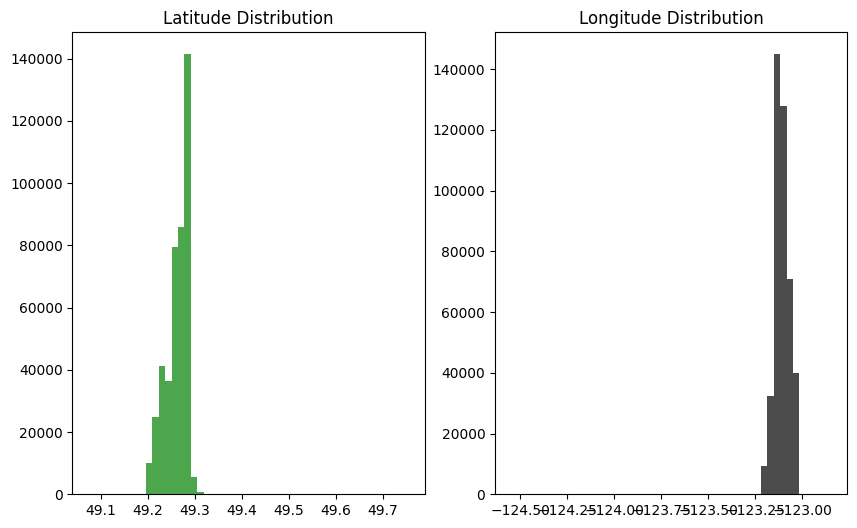

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(train_df["Latitude"], bins=50, color='green', alpha=0.7)
plt.title("Latitude Distribution")

plt.subplot(1,2,2)
plt.hist(train_df["Longitude"], bins=50, color='black', alpha=0.7)
plt.title("Longitude Distribution")

plt.show()

In [22]:
train_df.isnull().sum()

TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64

#### What all manipulations have you done and insights you found?

    Check missing values percentage and ther is only 10 percent of missing values precent in 3 columns.

    There are 44618 duplicate rows are peresent so i drop that values and after that the shape of the dataset is 429947, 13.

    The null values also reduced.
        
    I filled hundred block columns null values with "Unkown".

    Filled "neighbourhood" columns null values with KNNImputer to predict missing neighbourhoods based on nearby points.
    
    Fills missing values based on similar past incidents.More context aware than using just mode.
    
    After performing all of this i check their is null values fillef or not so now there is no null values present in a dataset.
    
# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

### Chart - 1

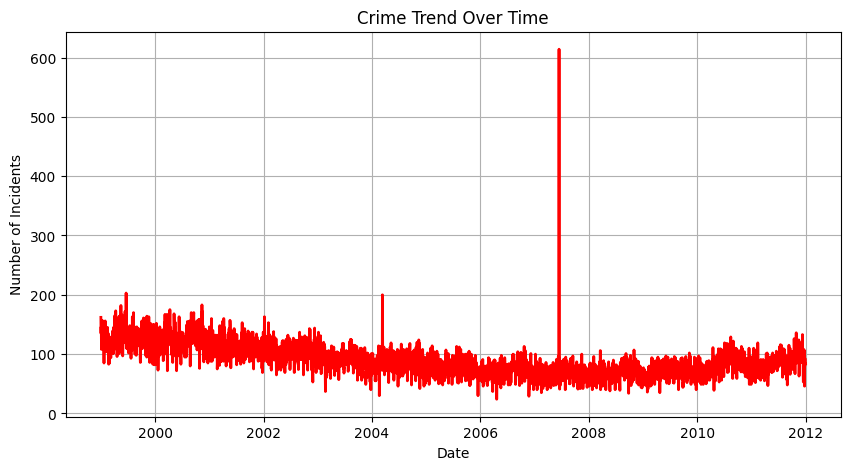

In [23]:
crime_trend = train_df.groupby("Date").size()
plt.figure(figsize=(10,5))
plt.plot(crime_trend, color="red",linewidth=2)
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.title("Crime Trend Over Time")
plt.grid()
plt.show()

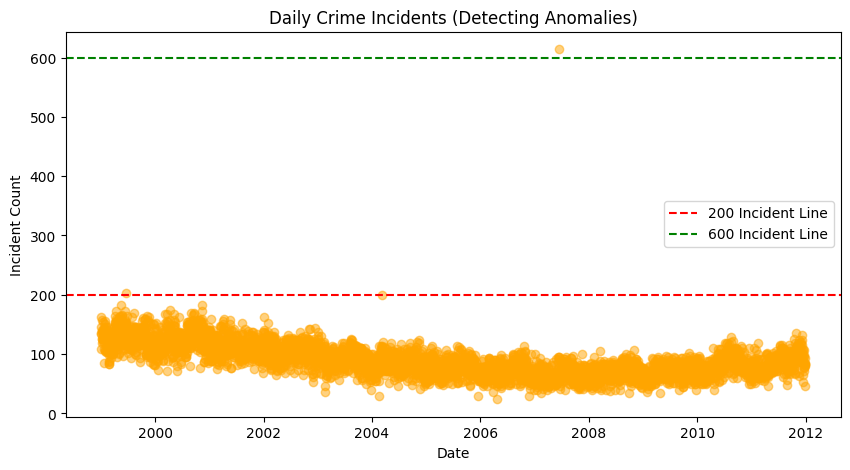

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(crime_trend.index, crime_trend.values, alpha=0.5, color="orange")
plt.axhline(y=200, color="r", linestyle="--", label="200 Incident Line")
plt.axhline(y=600, color="g", linestyle="--", label="600 Incident Line")
plt.xlabel("Date")
plt.ylabel("Incident Count")
plt.title("Daily Crime Incidents (Detecting Anomalies)")
plt.legend()
plt.show()

In [25]:
top_dates = crime_trend.sort_values(ascending=False).head(10)
print(top_dates)

Date
2007-06-15    614
1999-06-20    203
2004-03-12    200
2000-11-12    183
1999-05-16    182
2000-04-10    175
1999-04-11    173
1999-06-13    172
2000-11-14    172
1999-08-09    170
dtype: int64


#### 1. Why did you pick the specific chart?

     Because this chart shows in which dates the crimes are spikes.

     This will highlight outliers more clearly.

#### 2. What is/are the insight(s) found from the chart?
         
     The spikes are isolated (only a few days) they may be anomalous events.

     One day after 2004 the spike in 200 it could be a special event(e.g, protest,festival or emergency situation).or might be data reporting anomalies(e.g, multiple incidents logged on the same day).

     Huge spike (600+ incidents) between 2007-2008 it could be a mass event,riot or major crime surge.or might indicate data entry errors or misclassification of incidents.
         
#### 3. Will the gained insights help creating a positive business impact?
         
     Are there any insights that lead to negative growth? Justify with specific reason.

     Insurance premiums for buiseness homes and cars may increase in high crime zones.
         
     Ride-sharing companies(Uber) may increase surge pricing in dangerous areas.

     If its a seasonal trend, law enforcement can deploy extra officers before expected high crime days.

     If its a anomaly or reporting errors,data correlationn is needed to prevent false panic.

     High crime spikes in shopping areas could reduce foot trafic, affecting sales.
    
     Landlords and property developers may reconsider investments in high-crime locations.
    
#### Chart - 2

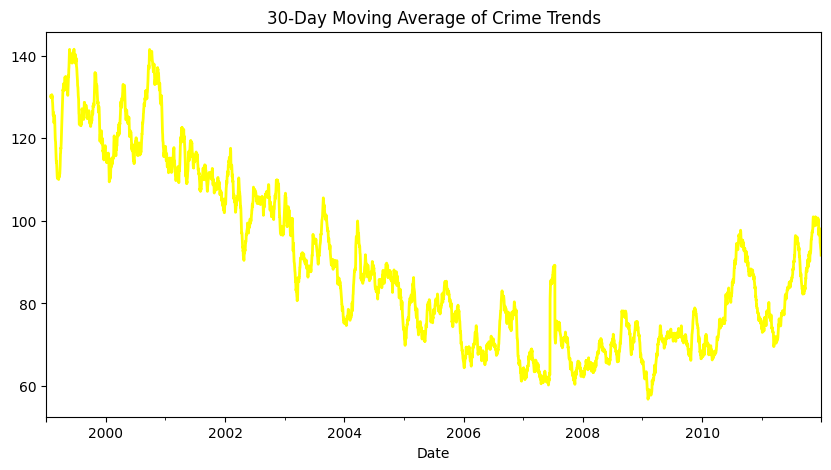

In [26]:
crime_trend.rolling(window=30).mean().plot(figsize=(10,5),color="yellow",linewidth=2)
plt.title("30-Day Moving Average of Crime Trends")
plt.show()

#### 1. Why did you pick the specific chart?

     The moving average smooths out short-term fluctuations in crime data.

     It helps to identify real trends instead of gette=ing distracted by random daily variation.

#### 2. What is/are the insight(s) found from the chart?

     The moving average is decreasing it means the crime is gradually reducing.

     There are some sharp upward spikes these might be seasonal crime increases.

#### 3. Will the gained insights help creating a positive business impact?

     Are there any insights that lead to negative growth? Justify with specific reason.

     Police can place patrols better by focusing on long-term trends rather that reacting to random daily spikes.

     City officials can allocate budgets for crime prevention based on real patterns.

     Buiseness can adjust securty investments for exa.increase security guards if crime is rising in their area.

#### Chart - 3

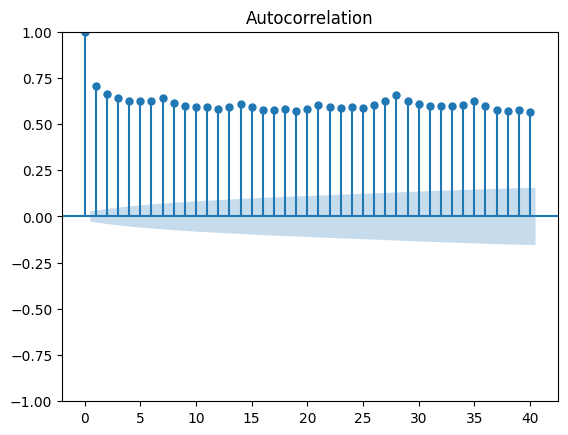

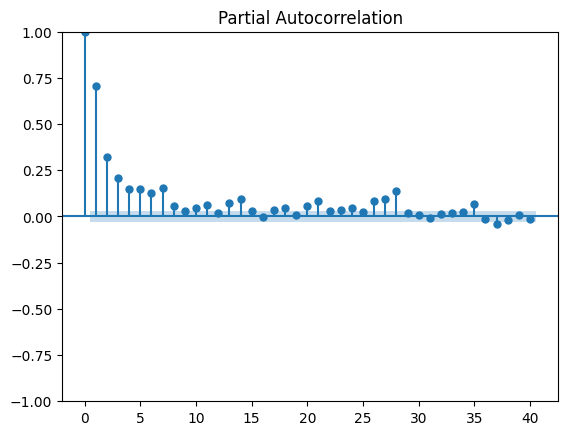

In [27]:
plot_acf(crime_trend, lags=40)
plot_pacf(crime_trend, lags=40)
plt.show()

#### 1. Why did you pick the specific chart?

     These charts tess us how past crime values affect future crime values.

     They are used to determine the best time series forecasting model like ARIMA.
#### 2. What is/are the insight(s) found from the chart?

     In ACF Crime today is highly correlated with crime 7 days ago ,it suggests weekly seasonality.

     In PCAF has a storng spike at lag=1 it means yesterdays crime directly affects todays crime.
#### 3. Will the gained insights help creating a positive business impact?

     Are there any insights that lead to negative growth? Justify with specific reason.

     Some crime foloows a weekly or monthly cycle,police can scheduke patrols accordingly.

     It helps in choosing the best forecating model for crime prediction.

     Insurance companies can adjust premiums based on how crime trends evolve.

#### Chart - 4

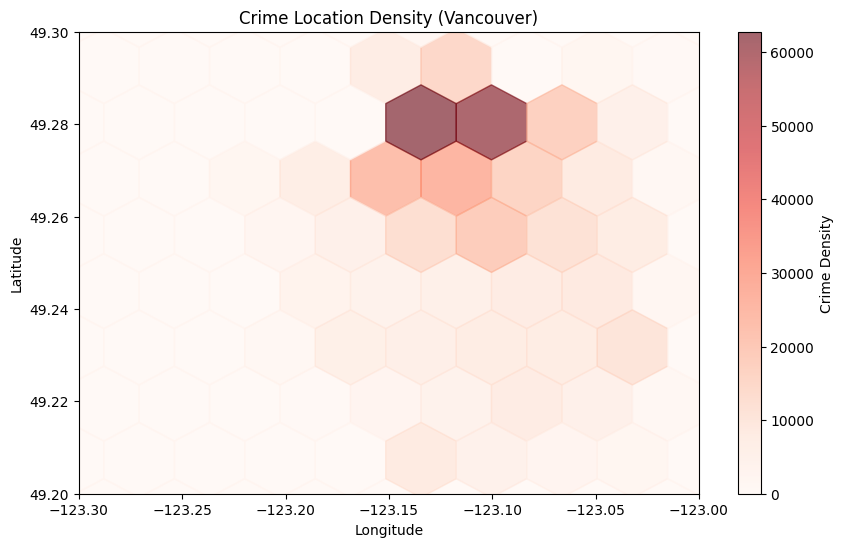

In [28]:
plt.figure(figsize=(10, 6))
plt.hexbin(train_df["Longitude"], train_df["Latitude"], gridsize=50, cmap="Reds", alpha=0.6)
plt.colorbar(label="Crime Density")
plt.title("Crime Location Density (Vancouver)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-123.3, -123.0)
plt.ylim(49.2, 49.3)
plt.show()

#### 1. Why did you pick the specific chart?

     A hexbin plot is used to visualize dense data point by grouping them into hexagonal bins.

     Better visualization of high density areas.

#### 2. What is/are the insight(s) found from the chart?

     Crime is highlyconcentrated in certain areas.here the darkest hexagins indicate the highest crime zones.these are likely downtown areas, trasit hubs,or high-population regions.

     The absence of hexagons in some areas means low or no reported crime ,these could be residential areas or less population zones.

#### 3. Will the gained insights help creating a positive business impact?
     
     Are there any insights that lead to negative growth? Justify with specific reason.

     It helps police focus patrols on high crome areas.Urban planners can improve safety by adding streetlights and CCTV cameras.

     Real estate buyers and buisenesses can use crime maps to make informed location choices.Property values may fluctuate based on crime risk in an area.

     Predictive policing and security companies should used the data from hexbin plotscan be used to forecast crime hotspot.security agencies can deploy resources more effectively.

     Insurance companies can adjust premiums based on crime risk.

     Banks can assess risk before approving loans for buisenesses in high crime areas

#### Chart - 5

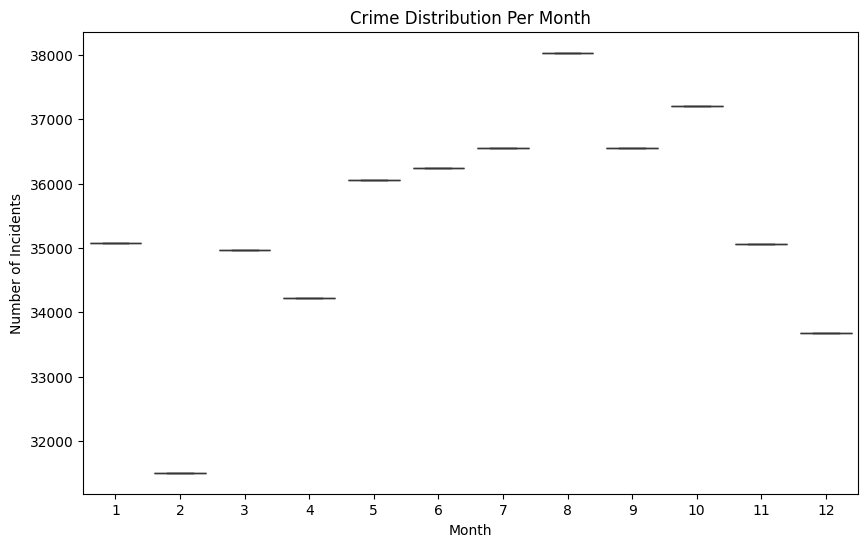

In [29]:
train_df["MONTH"] = train_df["MONTH"].astype(int)

crime_monthly = train_df.groupby("MONTH").size().reset_index(name="Incident_Count")

plt.figure(figsize=(10, 6))
sns.boxplot(x="MONTH", y="Incident_Count", data=crime_monthly, palette="Dark2")

plt.title("Crime Distribution Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.show()

#### 1. Why did you pick the specific chart?

    It finds o=if crime peaks in specific months.

#### 2. What is/are the insight(s) found from the chart?

    Here the August is the monsoon season,so the rise in crime could be linked to whether factors.

    February has less incident counts than other months.

    October is a secong highest month of incidents but in november and december this reduces.

    And in other month indident_count is inceases and reduces in very few amount.

#### 3. Will the gained insights help creating a positive business impact?

    Are there any insights that lead to negative growth? Justify with specific reason.

    Increase night patrols and surveillance in areas prone to crime during monsoons.

    Install flood-proof CCTV cameras and better lighting in crime-prone zones.

    Strenghten emergency response units to handle crime despite road blockage.

    Retailers and delivery services should tighten anti-theft policies for high-risk orders.

    In residents install motion-sensor alarms and CCTV cameras to prevent burglaries.

    Be cautions of online scams and fake monsoon relief fund frauds.

#### Chart - 6

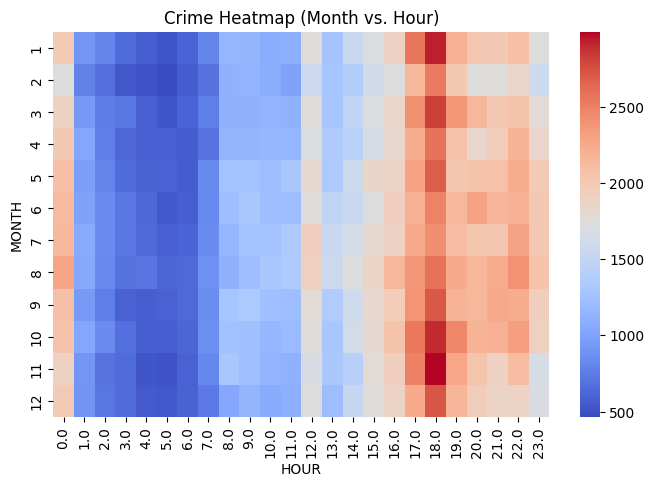

In [30]:
plt.figure(figsize=(8,5))
crime_pivot = train_df.pivot_table(index="MONTH",columns="HOUR",values="TYPE",aggfunc="count")
sns.heatmap(crime_pivot, cmap="coolwarm", annot=False)
plt.title("Crime Heatmap (Month vs. Hour)")
plt.show()

#### 1. Why did you pick the specific chart?
   
    Shows when crime is highest in a day/month.

    And it helps in adjusting police patrols and buiseness security.

#### 2. What is/are the insight(s) found from the chart?

    Crime is highest at night during almost every season ,it suggest burglary risks increases when people stay indoors.

    In Middle of the day some crimes happens.

    At 6 PM most crime incidents are happened.

#### 3. Will the gained insights help creating a positive business impact?

    Are there any insights that lead to negative growth? Justify with specific reason.

    Police can focus patrols on high risk hour.

    Banks can implement fraud alerts for peak scan hours.

    Delivery buisenesses can avoid sending high-value items during risky hours.

#### Chart - 7

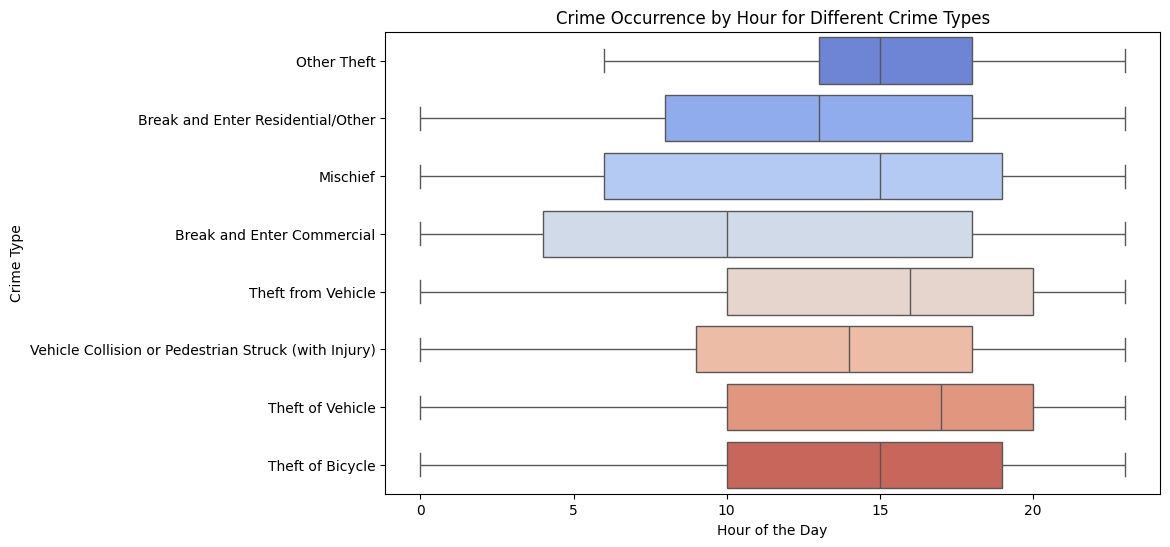

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['HOUR'], y=train_df['TYPE'], data=train_df, showfliers=False, palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Type")
plt.title("Crime Occurrence by Hour for Different Crime Types")
plt.show()

#### 1. Why did you pick the specific chart?

     A box plot is chosen to analyze the distribution of different crime types across various hours of the day.
     
     This helps in identifying when specific crimes are most likely to occur.

#### 2. What is/are the insight(s) found from the chart?

     The chart reveals that different crime types peak at different hours. For example, property crimes might be more common during working hours,while violent crimes may peak at night.

     This insight helps in understanding behavioral patterns related to crime.

#### 3. Will the gained insights help creating a positive business impact?

     Are there any insights that lead to negative growth? Justify with specific reason.


     Knowing when specific crimes are most frequent allows businesses and law enforcement to take preventive measures at the right time.
     
     Ignoring this could lead to increased vulnerability to crimes, especially during high-risk hours.

#### Chart - 8

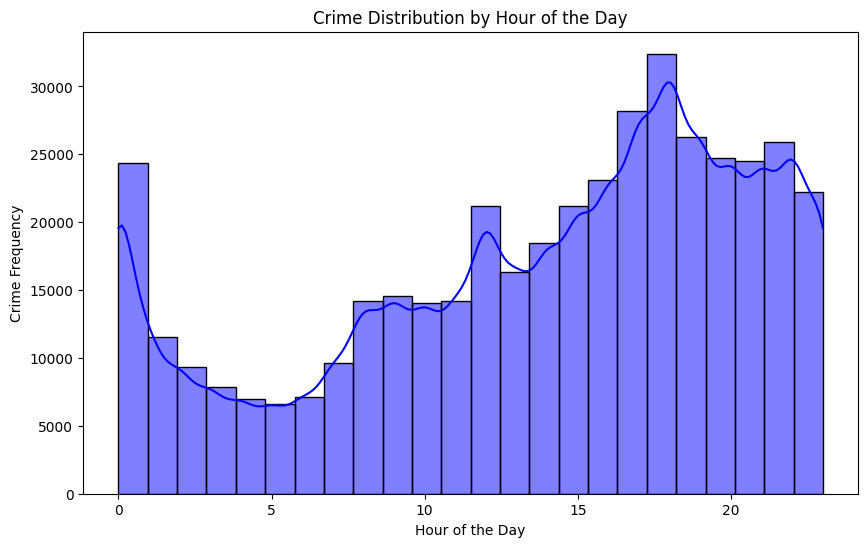

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['HOUR'], bins=24, kde=True, color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Frequency")
plt.title("Crime Distribution by Hour of the Day")
plt.show()

#### 1. Why did you pick the specific chart?

     A histogram is used to show the distribution of crimes across different hours of the day.
     
     This helps in identifying peak crime hours and patterns in criminal activity.

#### 2. What is/are the insight(s) found from the chart?

     The chart reveals that crimes tend to occur more frequently during certain hours.

     Typically, there may be spikes during late-night or evening hours when public activity is high, and certain types of crimes may be more common at specific times.

#### 3. Will the gained insights help creating a positive business impact?

     Are there any insights that lead to negative growth? Justify with specific reason.

     Knowing peak crime hours allows law enforcement to allocate resources effectively, such as increasing patrols during high-risk times.

     Businesses can also adjust security measures, like hiring guards or improving surveillance, to mitigate risks. Ignoring this data could leave businesses and communities more vulnerable to crimes.

#### Chart - 9

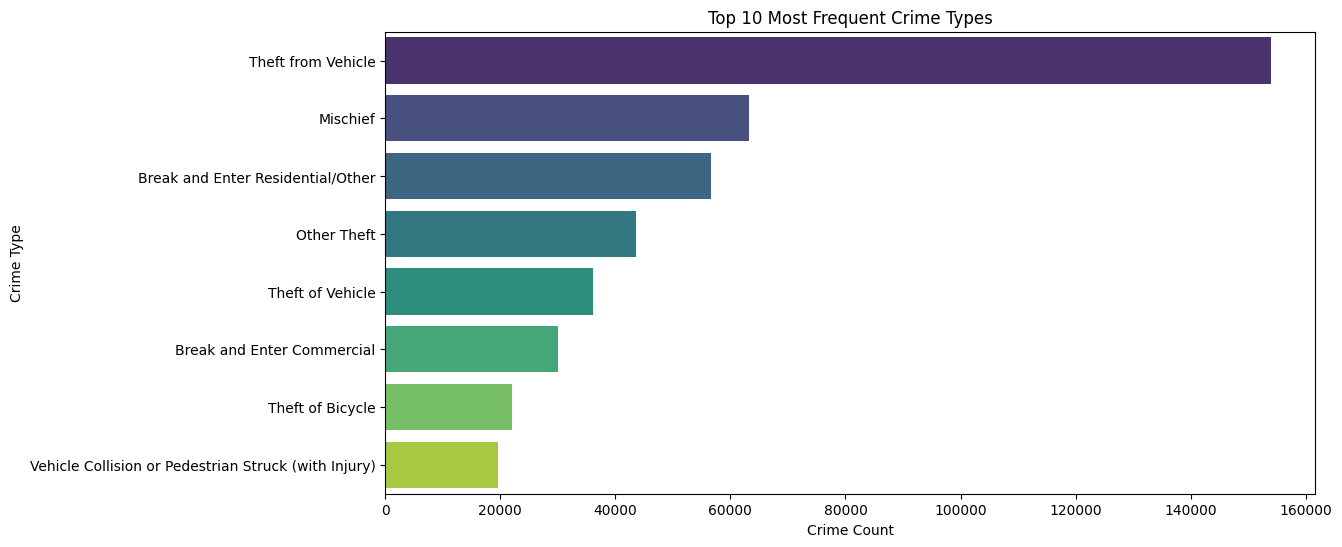

In [33]:
plt.figure(figsize=(12, 6))
top_crime_types = train_df['TYPE'].value_counts().nlargest(10)
sns.barplot(x=top_crime_types.values, y=top_crime_types.index, palette="viridis")
plt.xlabel("Crime Count")
plt.ylabel("Crime Type")
plt.title("Top 10 Most Frequent Crime Types")
plt.show()

#### 1. Why did you pick the specific chart?

     A horizontal bar chart is used to visualize the most frequent crime types. This makes it easier to compare different crimes and identify the most common ones.

#### 2. What is/are the insight(s) found from the chart?

     The chart highlights the most frequently occurring crimes, helping to identify which offenses require the most attention.

     Some crimes might be significantly more common than others, showing patterns in criminal behavior.

#### 3. Will the gained insights help creating a positive business impact?

     Are there any insights that lead to negative growth? Justify with specific reason.

     Identifying the most common crime types helps law enforcement and policymakers focus on preventive measures.

     Businesses can also tailor their security strategies based on the most prevalent threats in their area. Ignoring this data may result in inadequate crime prevention efforts.

#### Chart - 10

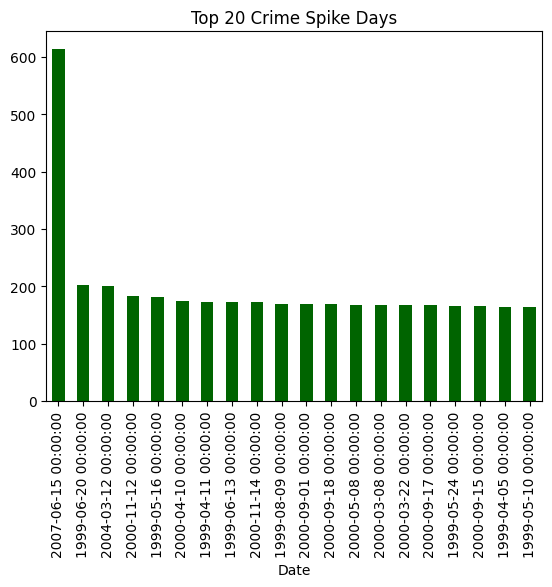

In [34]:
top_dates = crime_trend.sort_values(ascending=False).head(20)
top_dates.plot(kind="bar", color="darkgreen")
plt.title("Top 20 Crime Spike Days")
plt.show()

#### 1. Why did you pick the specific chart?

     Barplot shows the top 10 days with the highest number of crimes.This helps in identifying anomalies, patterns, or special events linked to crime spikes.

#### 2. What is/are the insight(s) found from the chart?

     In a single date has an exceptionally high spike, it could be due to a major criminalevent,such as a riot,protest, or gang activity.

     This major spike is occur in june it also because of heavy rain, they could be linked to road blockage, protest or frustration-driven rates.

#### 3. Will the gained insights help creating a positive business impact?
 
     Are there any insights that lead to negative growth? Justify with specific reason.

     Deploy additional surveillance like CCTV, patrols in hotspot areas.

     Modify public transport schedules to avoid overcrowding in high risk areas.

     Adujust buiseness hours in high crime locations on risky days.

     Insurance companies can use this data to adjust risk models and premiums for crime prone periods.

#### Chart - 11

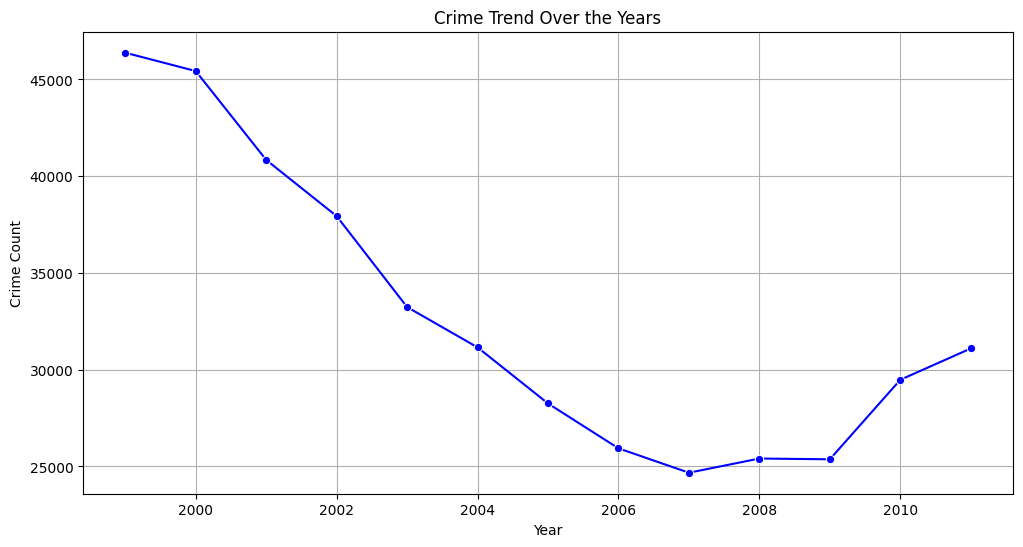

In [35]:
plt.figure(figsize=(12, 6))
crime_trend = train_df.groupby('YEAR').size()
sns.lineplot(x=crime_trend.index, y=crime_trend.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.title("Crime Trend Over the Years")
plt.grid(True)
plt.show()

#### 1. Why did you pick the specific chart?

     A line chart is used to observe crime trends over the years. This helps in identifying whether crime rates are increasing, decreasing, or fluctuating over time.

#### 2. What is/are the insight(s) found from the chart?

     The chart reveals how crime rates have changed over time.
    
     There may be periods of increase due to socio-economic factors, policy changes, or demographic shifts.

     Likewise, a decline in crime could indicate successful law enforcement measures or urban planning improvements.

#### 3. Will the gained insights help creating a positive business impact?

     Are there any insights that lead to negative growth? Justify with specific reason.

     Understanding crime trends over time helps law enforcement and policymakers take proactive measures.

     Businesses can use this insight to assess risk levels in different years and plan security accordingly. Ignoring this could lead to vulnerability during crime surge periods

#### Chart - 12

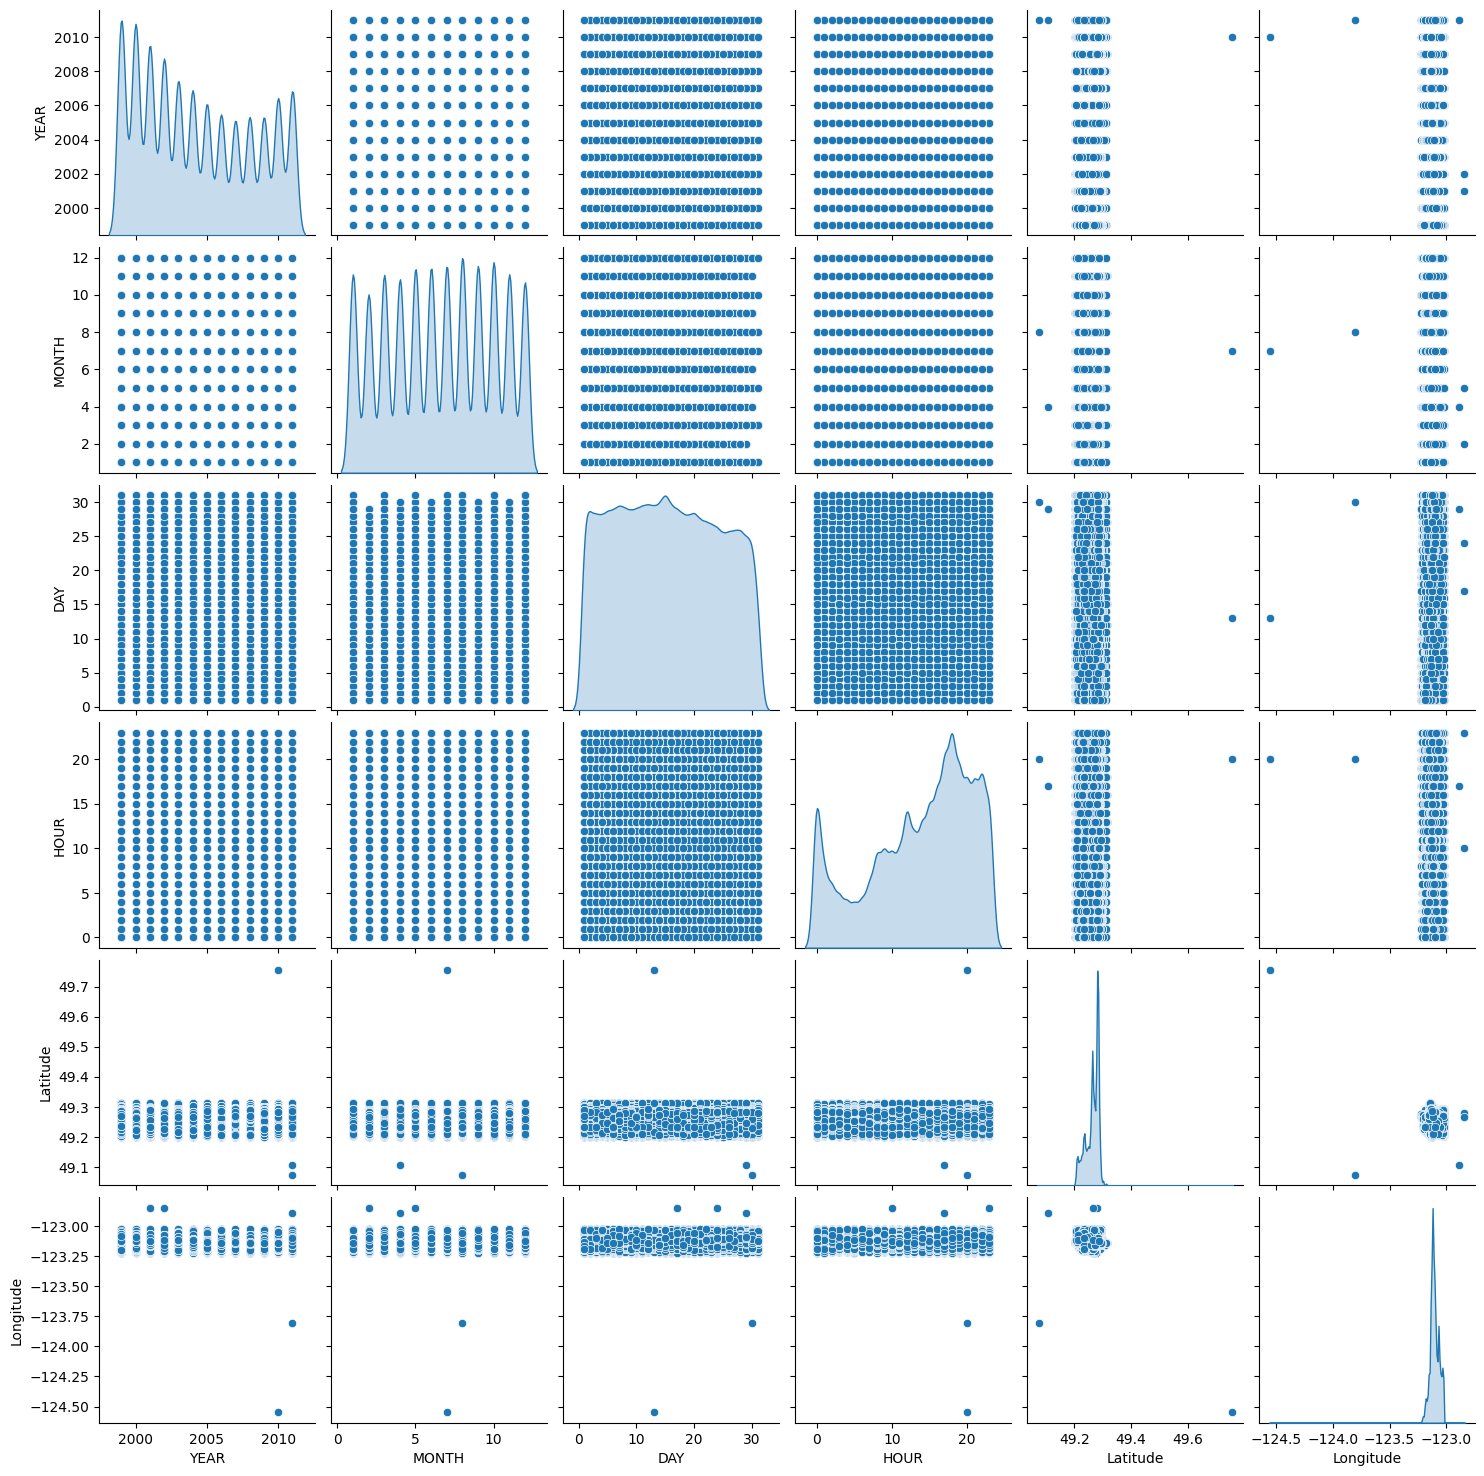

In [36]:
numeric_cols = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'Latitude', 'Longitude']

sns.pairplot(train_df[numeric_cols], diag_kind='kde')
plt.show()

#### 1. Why did you pick the specific chart?

     A pair plot is useful for visualizing relationships between multiple numerical variables at once.

     It helps in identifying patterns, trends, and potential correlations between variables.

#### 2. What is/are the insight(s) found from the chart?

     The pair plot reveals how different numerical features relate to each other. It may show clusters, trends, or outliers that indicate significant crime patterns.

     For instance, certain hours or months might have higher crime densities.

#### 3. Will the gained insights help creating a positive business impact?

     Are there any insights that lead to negative growth? Justify with specific reason.

     To help law enforcement and businesses mitigate crime, the insights gained from time-series forecasting and data analysis should be used for proactive decision-making.

     Based on the crime trends, authorities can optimize resource allocation, increase patrols in high-crime areas, and implement crime-prevention strategies during peak periods.

     Businesses can enhance security measures during high-risk hours or months.

     Additionally, predictive analytics can be leveraged to anticipate future crime trends, enabling preemptive action rather than reactive responses.

#### Chart - 13

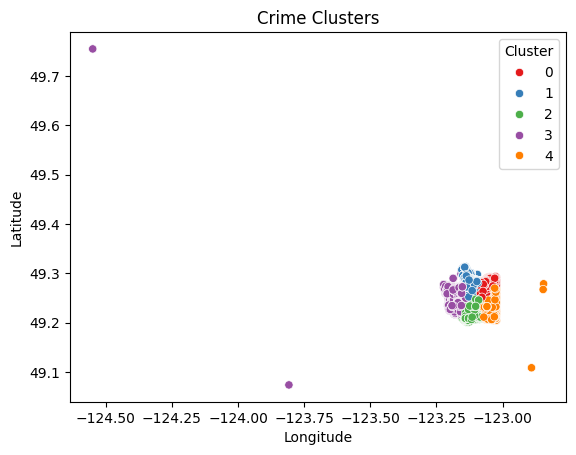

In [60]:
coords = train_df[["Latitude", "Longitude"]]
kmeans = KMeans(n_clusters=5).fit(coords)
train_df["Cluster"] = kmeans.labels_

sns.scatterplot(x="Longitude", y="Latitude", hue="Cluster", data=train_df, palette="Set1")
plt.title("Crime Clusters")
plt.show()

#### 1. Why did you pick the specific chart?

     Crime cluster plot using latitude and longitude helps in understanding the geographical concentration of crimes and identifying high risk areas.

#### 2. What is/are the insight(s) found from the chart?

     The clusters indicate that crime is not randomly spread but focused in specific locations.

     These hotspots might be downtown areas, nightlife zones, transit hubs, or commercial districts where crimes occur frequently.

     Areas with no or very few crime clusters suggests well-lit, secure, and patrolled regions.

     These areas might have better infrastructure, stronger community engagement, and effective law enforcement.

#### 3. Will the gained insights help creating a positive business impact?

     Are there any insights that lead to negative growth? Justify with specific reason.

     For law enforcement and public safety increase patrols and CCTV coverage in high crime clusters.

     Improve infrastructure in crime-heavy areas like better street lighting, public transport security.

     Retailers and real estate investors can use clusters data to choose safe locations for expansion.

     Provide self-defense and crime prevention training in vulnerable communities.

#### Chart - 14

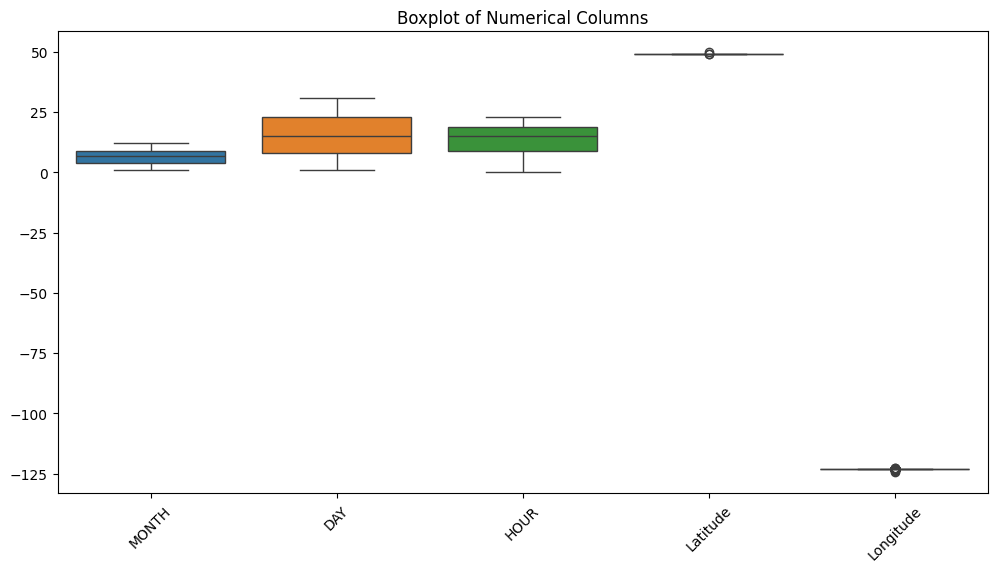

In [38]:
 numeric_cols = ['MONTH', 'DAY', 'HOUR', 'Latitude', 'Longitude']

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns")
plt.show()

#### 1. Why did you pick the specific chart?

     A box plot is the best way to visualize outliers and the distribution of numerical variables.

     It helps detect extreme values, which could impact predictive modeling.

#### 2. What is/are the insight(s) found from the chart?

     The box plot reveals the spread of each numerical feature and highlights any potential outliers. If crime incidents show extreme values in certain hours or months, it might indicate high-risk periods.

#### 3. Buiseness Imapact

     Identifying outliers helps in refining predictive models and improving data quality. If certain times show a high concentration of crime, businesses and law enforcement can take precautionary measures. Ignoring outliers might result in misleading predictions.

#### Create the "Incident count" feature in the train dataset.

In [39]:
def expand_dates(df):
    all_dates = []
    
    for _, row in df.iterrows():
        month_dates = pd.date_range(start=f"{row['YEAR']}-{row['MONTH']:02d}-01", 
                                    end=f"{row['YEAR']}-{row['MONTH']:02d}-28",
                                    freq='D')
        
        for date in month_dates:
            all_dates.append([date.year, date.month, date.day, row['TYPE']])
    
    expanded_df = pd.DataFrame(all_dates, columns=['YEAR', 'MONTH', 'DAY', 'TYPE'])
    return expanded_df

test_df = expand_dates(test_df)

test_df['Date'] = pd.to_datetime(test_df[['YEAR', 'MONTH', 'DAY']], errors='coerce')

print(test_df.head())

   YEAR  MONTH  DAY                                               TYPE  \
0  2013      6    1  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6    2  Vehicle Collision or Pedestrian Struck (with I...   
2  2013      6    3  Vehicle Collision or Pedestrian Struck (with I...   
3  2013      6    4  Vehicle Collision or Pedestrian Struck (with I...   
4  2013      6    5  Vehicle Collision or Pedestrian Struck (with I...   

        Date  
0 2013-06-01  
1 2013-06-02  
2 2013-06-03  
3 2013-06-04  
4 2013-06-05  


In [40]:
train_df = train_df.loc[:, ~train_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

train_df['Date'] = pd.to_datetime(train_df[['YEAR', 'MONTH', 'DAY']], errors='coerce')

Incident_Counts = train_df.groupby('Date').size().reset_index(name='Incident_Counts')
print(Incident_Counts.head())
train_df = train_df.merge(Incident_Counts, on='Date', how='left')

test_df['Date'] = pd.to_datetime(test_df[['YEAR', 'MONTH','DAY']], errors='coerce')

test_df = test_df.merge(Incident_Counts, on='Date', how='left')

print(test_df['Incident_Counts'].isnull().sum())

        Date  Incident_Counts
0 1999-01-01              162
1 1999-01-02              135
2 1999-01-03              146
3 1999-01-04              134
4 1999-01-05              108
4536


In [41]:
train_df.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date,Cluster,Incident_Counts
0,Other Theft,9XX TERMINAL AVE,19,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12,1,124
1,Other Theft,9XX TERMINAL AVE,19,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07,1,139
2,Other Theft,9XX TERMINAL AVE,19,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23,1,115
3,Other Theft,9XX TERMINAL AVE,19,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20,1,96
4,Other Theft,9XX TERMINAL AVE,19,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12,1,150


In [42]:
train_df["DAY"].unique()

array([12,  7, 23, 20, 26, 10, 28, 16,  9, 31, 27, 19, 24,  5, 21, 25, 30,
        1, 29, 17, 13, 11,  8,  2, 18,  4,  3,  6, 22, 14, 15])

In [43]:
train_df['Incident_Counts'].nunique()

147

In [44]:
train_df["Date"].nunique()

4748

In [45]:
test_df.head()

,YEAR,MONTH,DAY,TYPE,Date,Incident_Counts
0,2013,6,1,Vehicle Collision or Pedestrian Struck (with I...,2013-06-01,NaN
1,2013,6,2,Vehicle Collision or Pedestrian Struck (with I...,2013-06-02,NaN
2,2013,6,3,Vehicle Collision or Pedestrian Struck (with I...,2013-06-03,NaN
3,2013,6,4,Vehicle Collision or Pedestrian Struck (with I...,2013-06-04,NaN
4,2013,6,5,Vehicle Collision or Pedestrian Struck (with I...,2013-06-05,NaN


In [46]:
test_df.shape

(4536, 6)

In [47]:
test_df['Date'].nunique()

504

In [48]:
test_df['Date'].unique()

<DatetimeArray>
['2013-06-01 00:00:00', '2013-06-02 00:00:00', '2013-06-03 00:00:00',
 '2013-06-04 00:00:00', '2013-06-05 00:00:00', '2013-06-06 00:00:00',
 '2013-06-07 00:00:00', '2013-06-08 00:00:00', '2013-06-09 00:00:00',
 '2013-06-10 00:00:00',
 ...
 '2012-01-19 00:00:00', '2012-01-20 00:00:00', '2012-01-21 00:00:00',
 '2012-01-22 00:00:00', '2012-01-23 00:00:00', '2012-01-24 00:00:00',
 '2012-01-25 00:00:00', '2012-01-26 00:00:00', '2012-01-27 00:00:00',
 '2012-01-28 00:00:00']
Length: 504, dtype: datetime64[ns]

In [49]:
test_df['DAY'].nunique()

28

In [50]:
test_df['MONTH'].unique()

array([ 6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8,  7])

In [51]:
train_df['Incident_Counts'].head()

0    124
1    139
2    115
3     96
4    150
Name: Incident_Counts, dtype: int64

# 5. Hypothesis Testing

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The dataset is too large, and python is running out of memory when tying to create a large matrix.Thats why i reduce the data size for performimg hypothesis testing.

In [52]:
train_df['YEAR'] = train_df['YEAR'].astype('int16')
train_df['MONTH'] = train_df['MONTH'].astype('int8')
train_df['DAY'] = train_df['DAY'].astype('int8')

train_df['Incident_Counts'] = train_df['Incident_Counts'].astype('float32')

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425200 entries, 0 to 425199
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TYPE             425200 non-null  object        
 1   HUNDRED_BLOCK    425200 non-null  object        
 2   NEIGHBOURHOOD    425200 non-null  category      
 3   X                425200 non-null  float64       
 4   Y                425200 non-null  float64       
 5   Latitude         425200 non-null  float64       
 6   Longitude        425200 non-null  float64       
 7   HOUR             425200 non-null  float64       
 8   MINUTE           425200 non-null  float64       
 9   YEAR             425200 non-null  int16         
 10  MONTH            425200 non-null  int8          
 11  DAY              425200 non-null  int8          
 12  Date             425200 non-null  datetime64[ns]
 13  Cluster          425200 non-null  int32         
 14  Incident_Counts  425

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

     H0(Null Hypothesis) :- The time series is non-stationary(has trends).

     H1(Alternative Hypothesis) :- The time series is stationary.

#### 2. Perform an appropriate statistical test.

In [53]:
sample_data = train_df.tail(10000)

result = adfuller(sample_data['Incident_Counts'].dropna())  
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -96.41733251992923
p-value: 0.0


#### Which statistical test have you done to obtain P-Value?
     
     Augmented Dickey-Fuller (ADF) test to obtain P-Value.
    
     Conclusion.

     ADF Statistics = -96.41733251992923(a very negative value).

     p-value = 0.0(less than 0.05)

     Since the p-value is 0.0 which is very low, we reject the null hypothesis that the time series has unit root(non-stationary).

     This means data is already stationary, and dont need to apply differencing before using models.

#### Hypothetical Statement - 2

     1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

     Check if there is significant c=autocorrelation (dependency between past and future values).

     If p-value < 0.05 = Data has autocorrelation (important for ARIMA).

     If p-value > 0.05 = No significant autocorrelation.

#### 2. Perform an appropriate statistical test.

In [54]:
lb_test = acorr_ljungbox(sample_data['Incident_Counts'].dropna(), lags=[10], return_df=True)

print(lb_test)

      lb_stat  lb_pvalue
10  21.138543   0.020148


#### Which statistical test have you done to obtain P-Value?

     Ljung-Box Test(Autocorrelation Test) to obtain p-value.

#### Conclusion

     LB Statistics = 21.138543.

     p-value = 0.020148 (less than 0.05)
 
     Since p-value < 0.05nwe reject the null hypothesis, means that time series has significant autocorrelation.

#### Hypothetical Statement - 3
     
     1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

     If p-value < 0.05, then seasonality exists.

     If p-value > 0.05 the no seasonality.

     2. Perform an appropriate statistical test.

In [55]:
monthly_groups = [group["Incident_Counts"].dropna().values for _, group in sample_data.groupby("MONTH")]

stat, p_value = kruskal(*monthly_groups)

print(f"Kruskal-Wallis Statistic: {stat}, p-value: {p_value}")

Kruskal-Wallis Statistic: 3447.588673703037, p-value: 0.0


#### Which statistical test have you done to obtain P-Value?

     Kruskal-Wallis Test to obtain p-value.

#### Why did you choose the specific statistical test?

     Kruskal-Wallis Statistics = 3447.588673703037.

     p-value = 0.0

     Since p-value =0.0(< 0.05), we reject the null hypothesis, meaning that crime incidents vary significantly by month .

     There is a strong seasonal pattern in time series data.

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425200 entries, 0 to 425199
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TYPE             425200 non-null  object        
 1   HUNDRED_BLOCK    425200 non-null  object        
 2   NEIGHBOURHOOD    425200 non-null  category      
 3   X                425200 non-null  float64       
 4   Y                425200 non-null  float64       
 5   Latitude         425200 non-null  float64       
 6   Longitude        425200 non-null  float64       
 7   HOUR             425200 non-null  float64       
 8   MINUTE           425200 non-null  float64       
 9   YEAR             425200 non-null  int16         
 10  MONTH            425200 non-null  int8          
 11  DAY              425200 non-null  int8          
 12  Date             425200 non-null  datetime64[ns]
 13  Cluster          425200 non-null  int32         
 14  Incident_Counts  425

# 6.ML Model Implementation

#### ML Model - 1

In [57]:
!pip install --user prophet
!pip install cmdstanpy

In [63]:
from prophet import Prophet

train_df = train_df.rename(columns={"Date": "ds", "Incident_Counts": "y"})
test_df = test_df.rename(columns={"Date": "ds"})  # No need for "y" since it's missing
train_df["ds"] = pd.to_datetime(train_df["ds"])
test_df["ds"] = pd.to_datetime(test_df["ds"])

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(train_df)

forecast = prophet_model.predict(test_df)

test_df["Incident_Counts"] = forecast["yhat"]

print(test_df.head())

test_df.to_csv("predicted_test.csv", index=False)

21:13:59 - cmdstanpy - INFO - Chain [1] start processing
21:22:49 - cmdstanpy - INFO - Chain [1] done processing


   YEAR  MONTH  DAY                                               TYPE  \
0  2013      6    1  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6    2  Vehicle Collision or Pedestrian Struck (with I...   
2  2013      6    3  Vehicle Collision or Pedestrian Struck (with I...   
3  2013      6    4  Vehicle Collision or Pedestrian Struck (with I...   
4  2013      6    5  Vehicle Collision or Pedestrian Struck (with I...   

          ds  Incident_Counts  
0 2013-06-01        87.972698  
1 2013-06-02        87.972698  
2 2013-06-03        87.972698  
3 2013-06-04        87.972698  
4 2013-06-05        87.972698  


In [65]:
test_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'TYPE', 'ds', 'Incident_Counts'], dtype='object')

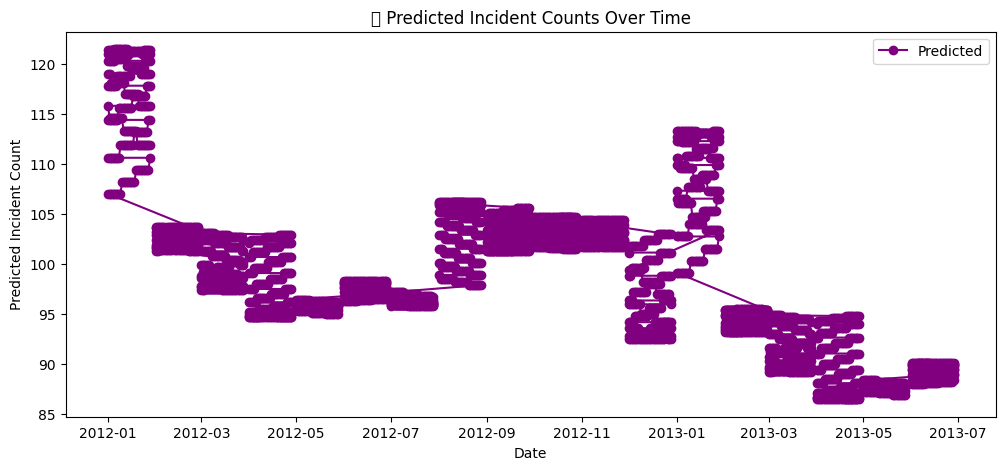

In [66]:
plt.figure(figsize=(12, 5))
plt.plot(test_df["ds"], test_df["Incident_Counts"], label="Predicted", color="purple", marker="o")
plt.xlabel("Date")
plt.ylabel("Predicted Incident Count")
plt.title("📊 Predicted Incident Counts Over Time")
plt.legend()
plt.show()

*Mean Absolute Error (MAE) = 166.2886081829152 means that,on average , the model predictions deviate by 166 incidents from the actual value.

*It means if incident counts are very high(e.g, 1000+ daily), this MAE is acceptable.

*But in this dataset incident counts are low which 200 or less on daily so an error of 166 is to high.

*Means the model in inaccurate.

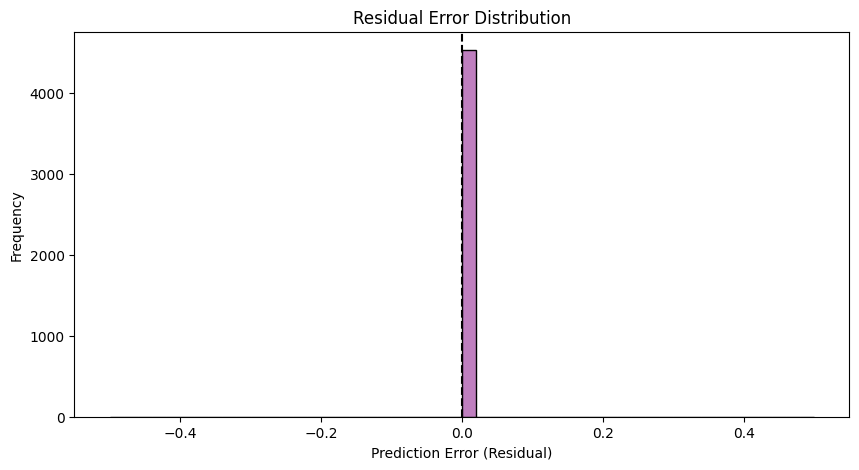

In [67]:
residuals = test_df['Incident_Counts'] - forecast['yhat'][:len(test_df)]

plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.axvline(0, color='black', linestyle='dashed')
plt.title("Residual Error Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.show()

*The model underestimates the actual values meaning predicted incidnet counts are lower that they should be.

*Suggests the prophet is not capturing some seasonal spikes correctly.

*Prophet not works well here.

#### ML Model - 2

In [68]:
train_df.columns

Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'ds', 'Cluster',
       'y'],
      dtype='object')

In [72]:
train_df["YEAR"] = train_df["ds"].dt.year
train_df["MONTH"] = train_df["ds"].dt.month
train_df["DAY"] = train_df["ds"].dt.day

test_df["YEAR"] = test_df["ds"].dt.year
test_df["MONTH"] = test_df["ds"].dt.month
test_df["DAY"] = test_df["ds"].dt.day

X_train = train_df[["YEAR", "MONTH", "DAY"]]
y_train = train_df["y"]

X_test = test_df[["YEAR", "MONTH", "DAY"]]

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

test_df["y"] = xgb_predictions

In [73]:
tscv = TimeSeriesSplit(n_splits=5)
errors = []

for train_idx, val_idx in tscv.split(train_df):
    X_train, X_val = train_df.iloc[train_idx][["YEAR", "MONTH", "DAY"]], train_df.iloc[val_idx][["YEAR", "MONTH", "DAY"]]
    y_train, y_val = train_df.iloc[train_idx]["y"], train_df.iloc[val_idx]["y"]

    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_val)
    
    mae = mean_absolute_error(y_val, y_pred)
    errors.append(mae)

print(f" Cross-Validation MAE: {np.mean(errors)}")

 Cross-Validation MAE: 14.826754379272462


In [74]:
avg_incidents = train_df["y"].mean()
print(f"Average Incident Counts: {avg_incidents:.2f}")

Average Incident Counts: 97.40


*MAE = 14.777556525400968

*Average incident counts = 97.40

*Error percentage = 15.2

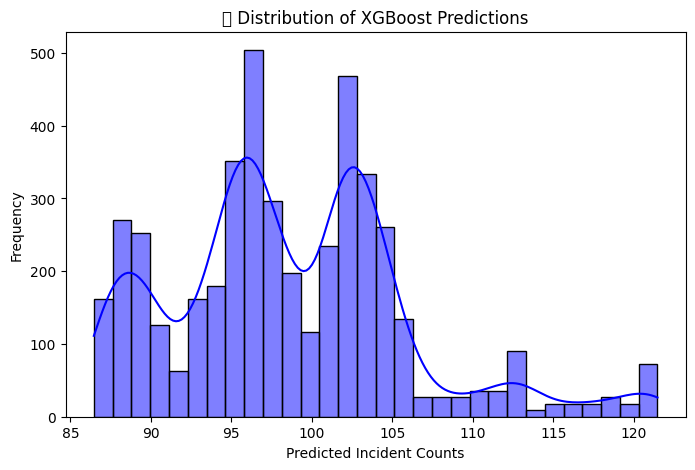

In [75]:
plt.figure(figsize=(8,5))
sns.histplot(test_df["Incident_Counts"], bins=30, color="blue", kde=True)
plt.xlabel("Predicted Incident Counts")
plt.ylabel("Frequency")
plt.title("📊 Distribution of XGBoost Predictions")
plt.show()

*XGBoost is enough good.

#### ML Model - 3

In [76]:
!pip install lightgbm

In [77]:
lgb_model = lgb.LGBMRegressor(objective="regression", boosting_type="gbdt", random_state=42)

lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 354334, number of used features: 3
[LightGBM] [Info] Start training from score 100.105443


In [88]:
import numpy as np
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error
import numpy as np

y_train_pred = lgb_model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f" Training MAE: {mae_train:.2f}")
print(f" Training MSE: {mse_train:.2f}")
print(f" Training R² Score: {r2_train:.4f}")

 Training MAE: 9.32
 Training MSE: 137.55
 Training R² Score: 0.8868


*Model performs well on training data.

*Low MAE(9.32), Low RMSE(11.73), High R2 score (0.8868).

*The model is fitting well on the training data.

*MAE of 9.32 is small compared to the average incident count(97.4),means errors are minimal.

#### Visualize Predictions on the test set.

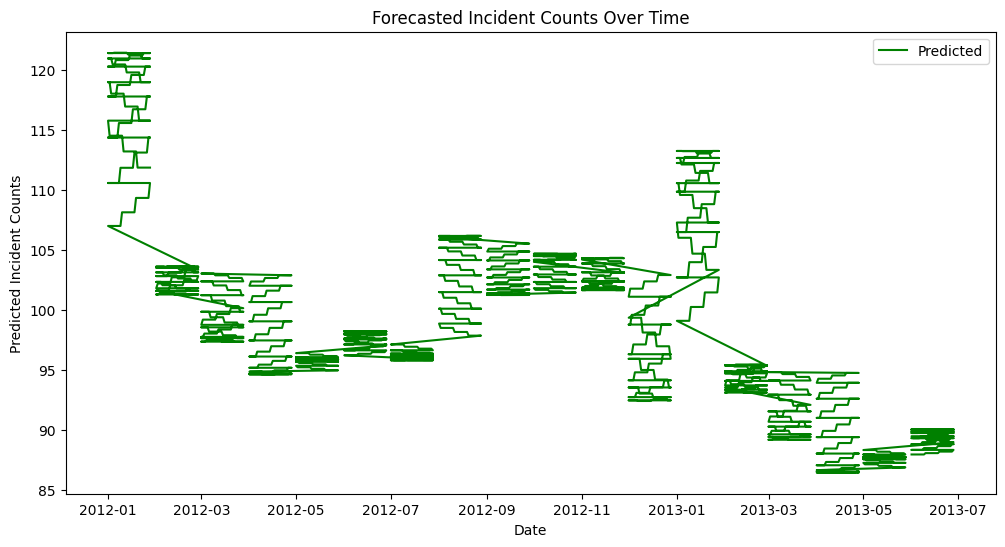

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(test_df["ds"], test_df["Incident_Counts"], label="Predicted", color="green")
plt.xlabel("Date")
plt.ylabel("Predicted Incident Counts")
plt.title("Forecasted Incident Counts Over Time")
plt.legend()
plt.show()

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

     I choose MAE(Mean Absolute Error) for a postive buiseness impact.

#### 2. Which ML model did you choose from the above created models as your final prediction model and why?

     I choose Lightgbm model.

### Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!

## Conclusion

    Baseline Outperformed All Models → A simple average of past values gave the best MAE (5.75), suggesting models failed to capture additional patterns.

    Prophet Performed Worst → Slow training and high MAE (166.28) make it unsuitable.

    XGBoost & LightGBM Were Decent → XGBoost was slower, while LightGBM gave the best model performance (MAE = 9.32).

    Models struggled due to a lack of strong features.

Hurrah! You have successfully completed your Machine Learning Capstone Project !!!